**Steps:**
- STEP 1:Importing required libraries
- STEP 2:Importing the dataset
- STEP 3:Data Visualization
- STEP 4:Finding optimum number of clusters
- STEP 5:Applying k means clustering on the data
- STEP 6:Ploting the clusters

# STEP 1:Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")
%matplotlib inline

# STEP 2:Importing the dataset

In [3]:
#Reading data iris dataset
Iris =pd.read_csv("Iris.csv")
print("Data imported successfully")

Data imported successfully


In [4]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
Iris.shape

(150, 6)

In [7]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [8]:
Iris=Iris.drop(columns=['Id'])
Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
Iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
Iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
Iris.drop_duplicates(inplace=True)
Iris.shape

(147, 5)

<AxesSubplot:xlabel='Species', ylabel='count'>

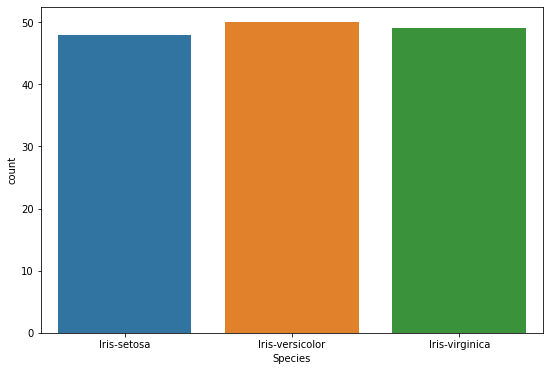

In [35]:
plt.rcParams['figure.figsize']=9,6
Iris["Species"].value_counts()
sns.countplot(Iris.Species)

# STEP 3:Data Visualization

**1. Box plot**

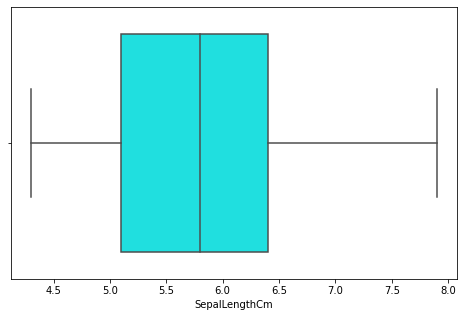

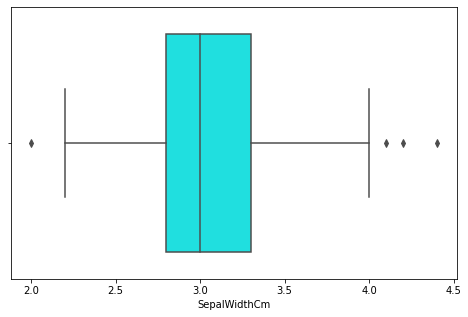

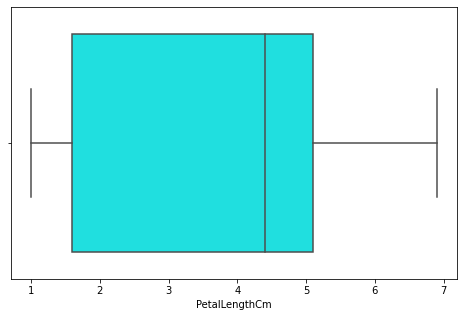

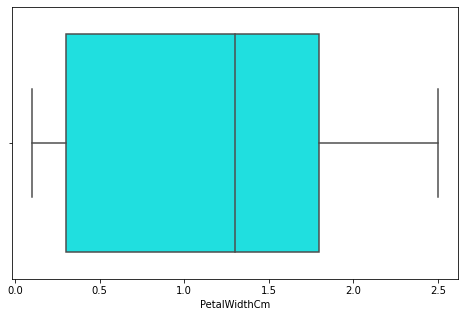

In [13]:
#Check for any outliers in the numeric data
for i in Iris.columns:
    if Iris[i].dtype=='float64':
        plt.figure(figsize=(8,5))
        sns.boxplot(Iris[i],color="cyan")
        plt.show()

In [14]:
#Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(Iris['SepalWidthCm'],[25,75])
iqr = q3 - q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
Iris['SepalWidthCm'] = Iris['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)

<AxesSubplot:xlabel='SepalWidthCm'>

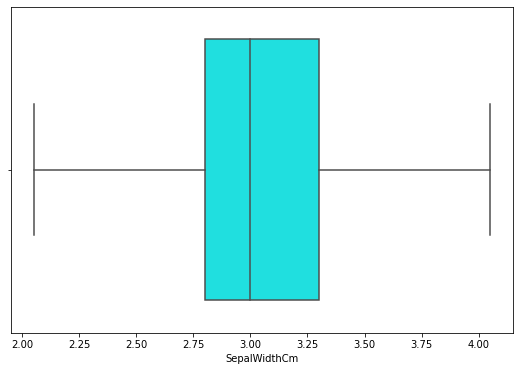

In [15]:
sns.boxplot(Iris['SepalWidthCm'],color="cyan")

In [16]:
#correlation matrix
Iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


**2. Heatmap**

<AxesSubplot:>

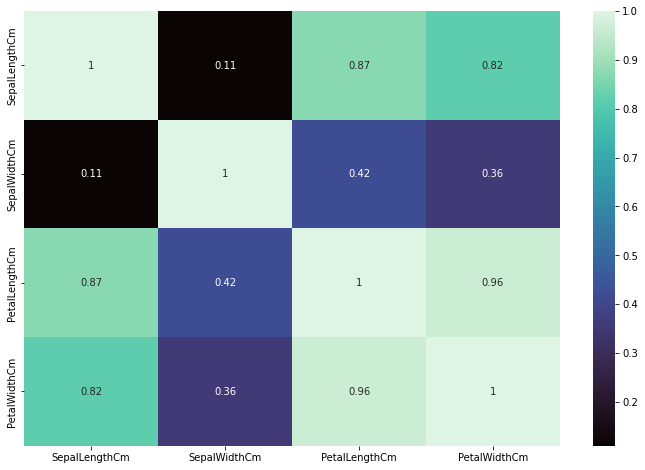

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(abs(Iris.corr()), cmap ='mako',annot= True)

**3. Pair plot**

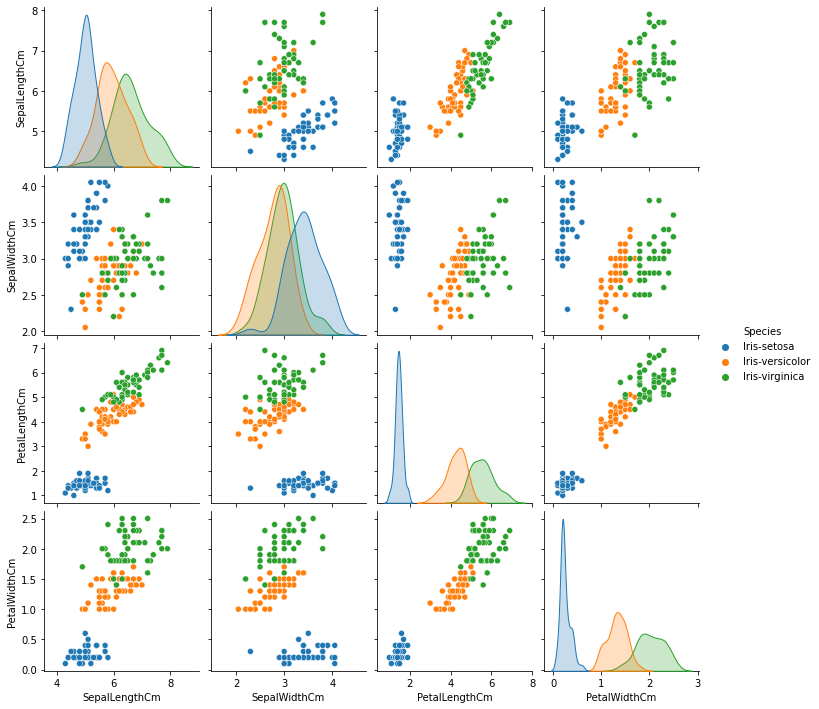

In [18]:
sns.pairplot(Iris,hue='Species')

**4. Violin plot**

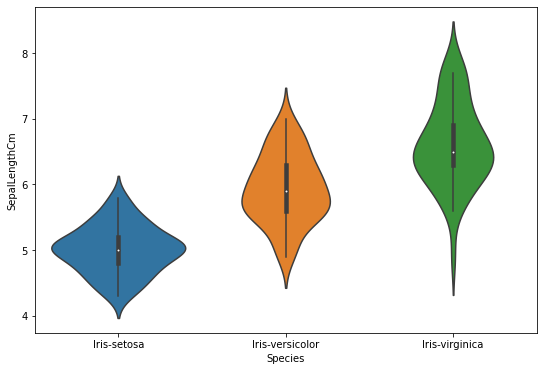

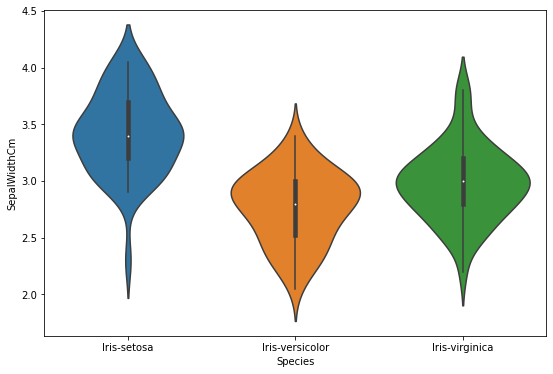

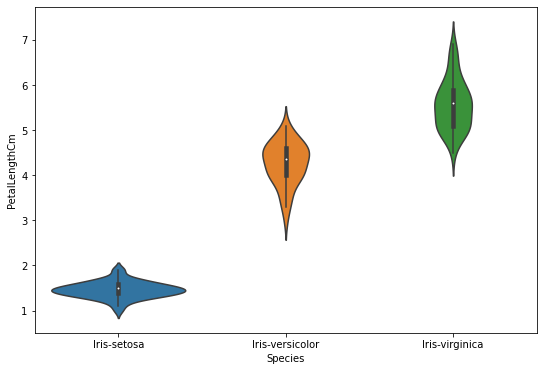

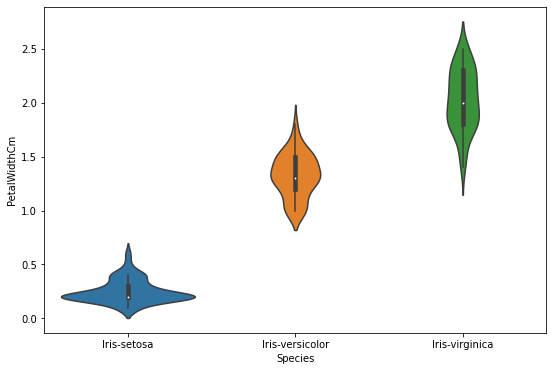

In [19]:
plt.figure(figsize=(9,6))
sns.violinplot(x= "Species",y="SepalLengthCm",data=Iris)
plt.show()
sns.violinplot(x= "Species",y="SepalWidthCm",data=Iris)
plt.show()
sns.violinplot(x= "Species",y="PetalLengthCm",data=Iris)
plt.show()
sns.violinplot(x= "Species",y="PetalWidthCm",data=Iris)
plt.show()

# STEP 4:Finding optimum number of clusters


In [20]:
from sklearn.cluster import KMeans

In [21]:
SSE =[]
for i in range(1,10):
    kmeans =KMeans(n_jobs = -1, n_clusters = i, init = 'k-means++')
    kmeans.fit(Iris.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

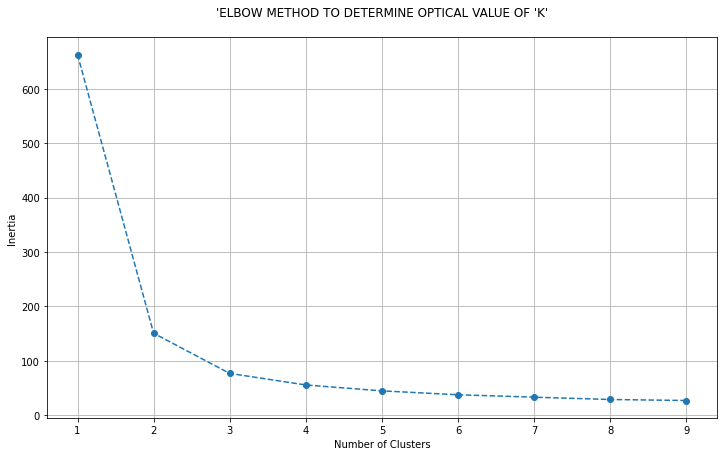

In [22]:
df = pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})
plt.figure(figsize=(12,7))
plt.plot(df['Cluster'],df['SSE'],'--',marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("'ELBOW METHOD TO DETERMINE OPTICAL VALUE OF 'K'\n")
plt.grid()

In this, case optimum number of clusters is 3

# STEP 5:Applying k means clustering on the data

In [23]:
kmeans = KMeans(n_jobs = -1 , n_clusters=3,init = 'k-means++')
kmeans.fit(Iris.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [24]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [25]:
Iris['cluster'] = kmeans.labels_

Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [26]:
display(Iris['cluster'].value_counts(),Iris['Species'].value_counts())

1    61
0    48
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# STEP 6:Ploting the clusters

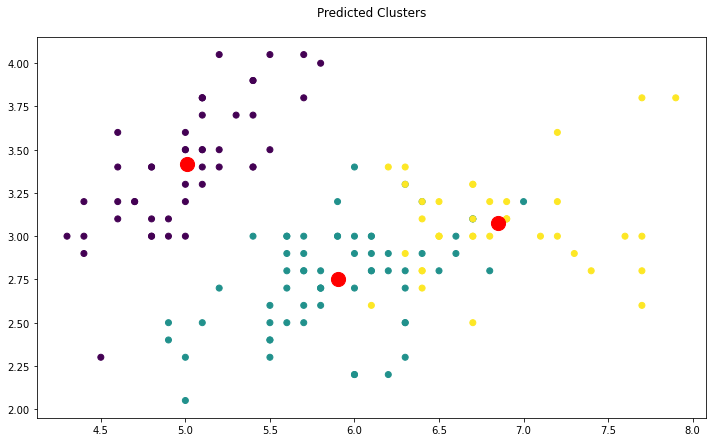

In [27]:
plt.figure(figsize=(12,7))
plt.scatter(Iris['SepalLengthCm'], Iris['SepalWidthCm'] , c=Iris.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200 , c='red', label ='Centroids')
plt.show()

In [28]:
Iris.loc[Iris['Species']=='Iris-setosa']['cluster'].value_counts()

0    48
Name: cluster, dtype: int64

In [29]:
Iris.loc[Iris['Species']=='Iris-versicolor']['cluster'].value_counts()

1    48
2     2
Name: cluster, dtype: int64

In [30]:
Iris.loc[Iris['Species']=='Iris-virginica']['cluster'].value_counts()

2    36
1    13
Name: cluster, dtype: int64

In [31]:
Iris['Species_encoded'] = Iris['Species'].apply(lambda x:0 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 1)
Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [32]:
from sklearn.metrics import classification_report
print(classification_report(Iris['Species_encoded'],Iris['cluster']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.79      0.96      0.86        50
           2       0.95      0.73      0.83        49

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



<AxesSubplot:>

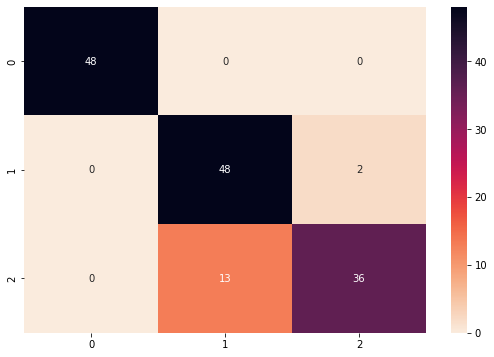

In [33]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Iris['Species_encoded'],Iris['cluster']),cmap='rocket_r', annot=True)

**Thank you!**